In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

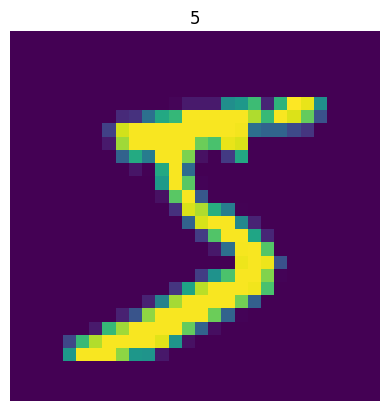

In [8]:
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.axis('off')
plt.show()

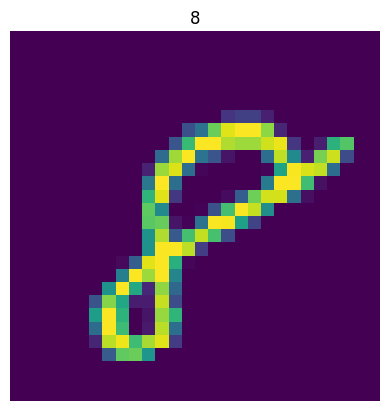

In [9]:
plt.imshow(X_train[-1])
plt.title(y_train[-1])
plt.axis('off')
plt.show()

In [10]:
# scale pixel values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# build the ANN model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


### 1. Flatten Layer
- Input: each MNIST image is 28×28 pixels → total 784 pixels.
- Flatten just reshapes 2D (28×28) into 1D (784).
- No trainable parameters (since it only reshapes, doesn’t learn).

### 2. Dense (Hidden Layer 1)
- Input: 784 values (from Flatten)
- Output: 128 neurons

**Parameters:**
(784×128)+128 = 100352+128 = 100480
- First part: weights (one weight for each connection).
- Second part: bias (one bias per neuron).

### 3. Dense_1 (Hidden Layer 2)
- Input: 128 neurons from previous layer
- Output: 32 neurons

**Parameters:**
(128×32)+32 = 4096+32 = 4128

### 4. Dense_2 (Output Layer)
- Input: 32 neurons from previous layer
- Output: 10 neurons (digits 0–9)

**Parameters:**
(32×10)+10 = 320+10 = 330

### **Total Parameters:**
100480 + 4128 + 330 = 104938

In [14]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.9209 - val_loss: 0.1128 - val_accuracy: 0.9717
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1161 - accuracy: 0.9652 - val_loss: 0.0960 - val_accuracy: 0.9722
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.0806 - val_accuracy: 0.9768
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9801 - val_loss: 0.0817 - val_accuracy: 0.9755
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0761 - val_accuracy: 0.9772
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0822 - val_accuracy: 0.9785
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0897 - val_accuracy:

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1084 - accuracy: 0.9745
Test accuracy: 0.9745000600814819
Test loss: 0.10835907608270645


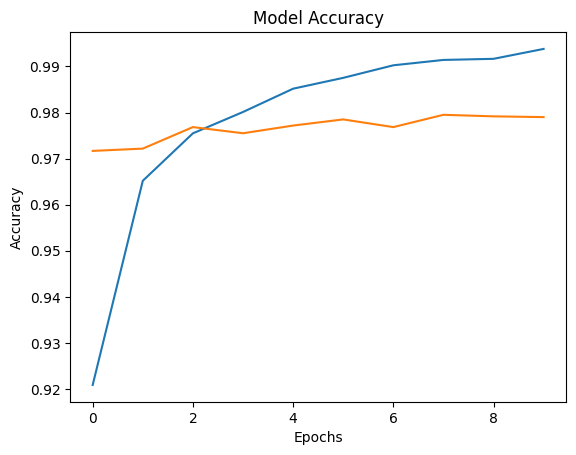

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

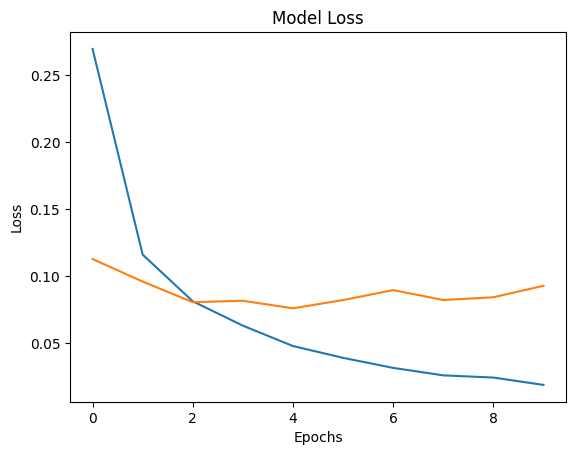

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [19]:
# get model predictions for test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 0s 1ms/step


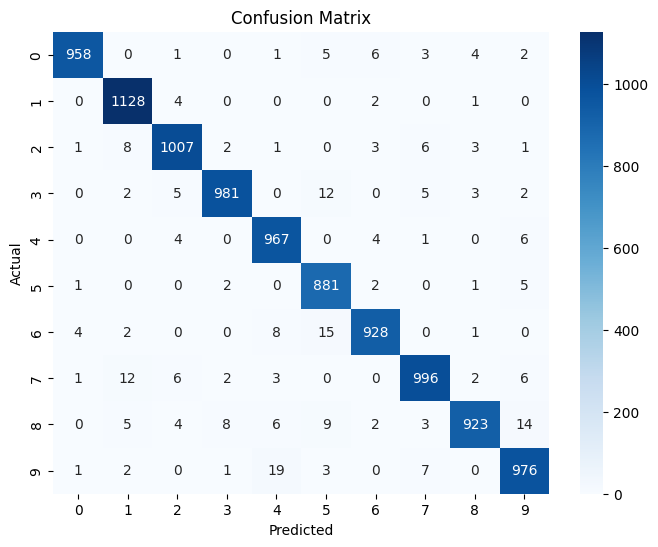

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.99      0.97       892
           6       0.98      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



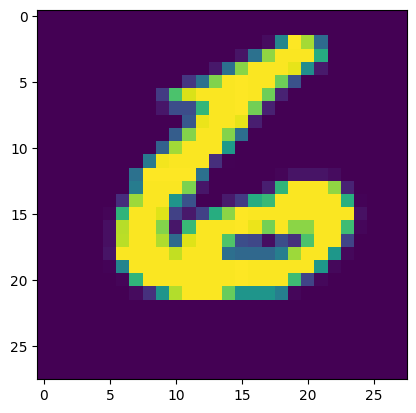

In [22]:
# predict output for one test image
plt.imshow(X_test[-1])
plt.show()

In [23]:
prediction = np.argmax(model.predict(np.expand_dims(X_test[-1], axis=0)))

1/1 [==============================] - 0s 78ms/step


In [24]:
print('Predicted digit:', prediction)
print('Actual digit:', y_test[-1])

Predicted digit: 6
Actual digit: 6
